In [21]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt

from scipy.stats import skew
from scipy.stats import pearsonr

In [22]:
train = pd.read_csv("house/train.csv")
test = pd.read_csv("house/test.csv")

In [23]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [24]:
test.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1461,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,AllPub,...,120,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal
1,1462,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal
2,1463,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal
3,1464,60,RL,78.0,9978,Pave,NaN,IR1,Lvl,AllPub,...,0,0,NaN,NaN,NaN,0,6,2010,WD,Normal
4,1465,120,RL,43.0,5005,Pave,NaN,IR1,HLS,AllPub,...,144,0,NaN,NaN,NaN,0,1,2010,WD,Normal


In [25]:
# train, test set에 대하여 id를 제외한 모든 컬럼 concat
all_data = pd.concat((train.loc[:, "MSSubClass":"SaleCondition"], test.loc[:, "MSSubClass":'SaleCondition']))

In [26]:
all_data

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,6,2006,WD,Normal
1455,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml
1456,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml
1457,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal


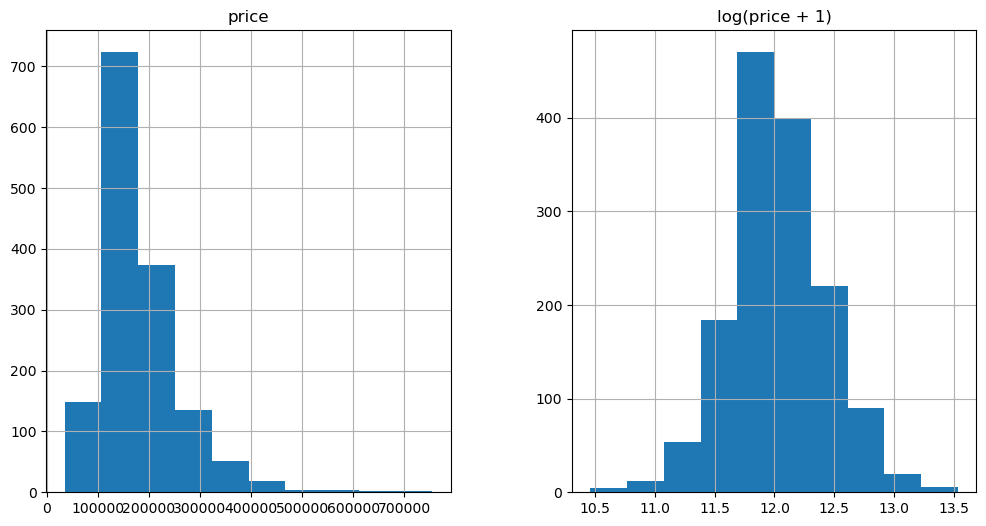

In [27]:
# 히스토그램 시각화 그래프 크기 설정
matplotlib.rcParams['figure.figsize'] = (12.0, 6.0)

# prices 이름의 df 생성
# price와 log1p를 취해준 값
prices = pd.DataFrame({"price":train["SalePrice"], "log(price + 1)":np.log1p(train["SalePrice"])})

# 히스토그램으로 출력
# 음의 skew값을 가지는 SalePrice 값
# log1p를 취해줌으로써 정규 분포에 가까워진 모습을 볼 수 있음
prices.hist();

In [28]:
# train의 label에 log1p 처리
train["SalePrice"] = np.log1p(train["SalePrice"])

# all_data의 dtypes 중 object가 아닌 index feature들을 numeric_feats에 저장
# all_data.dtypes[all_data.dtypes != "object"].index
numeric_feats = all_data.dtypes[all_data.dtypes != "object"].index

skewed_feats = train[numeric_feats].apply(lambda x: skew(x.dropna()))
skewed_feats

MSSubClass        1.406210
LotFrontage       2.160866
LotArea          12.195142
OverallQual       0.216721
OverallCond       0.692355
YearBuilt        -0.612831
YearRemodAdd     -0.503044
MasVnrArea        2.666326
BsmtFinSF1        1.683771
BsmtFinSF2        4.250888
BsmtUnfSF         0.919323
TotalBsmtSF       1.522688
1stFlrSF          1.375342
2ndFlrSF          0.812194
LowQualFinSF      9.002080
GrLivArea         1.365156
BsmtFullBath      0.595454
BsmtHalfBath      4.099186
FullBath          0.036524
HalfBath          0.675203
BedroomAbvGr      0.211572
KitchenAbvGr      4.483784
TotRmsAbvGrd      0.675646
Fireplaces        0.648898
GarageYrBlt      -0.648708
GarageCars       -0.342197
GarageArea        0.179796
WoodDeckSF        1.539792
OpenPorchSF       2.361912
EnclosedPorch     3.086696
3SsnPorch        10.293752
ScreenPorch       4.117977
PoolArea         14.813135
MiscVal          24.451640
MoSold            0.211835
YrSold            0.096170
dtype: float64

In [29]:
skewed_feats = skewed_feats[skewed_feats > 0.75]
skewed_feats

MSSubClass        1.406210
LotFrontage       2.160866
LotArea          12.195142
MasVnrArea        2.666326
BsmtFinSF1        1.683771
BsmtFinSF2        4.250888
BsmtUnfSF         0.919323
TotalBsmtSF       1.522688
1stFlrSF          1.375342
2ndFlrSF          0.812194
LowQualFinSF      9.002080
GrLivArea         1.365156
BsmtHalfBath      4.099186
KitchenAbvGr      4.483784
WoodDeckSF        1.539792
OpenPorchSF       2.361912
EnclosedPorch     3.086696
3SsnPorch        10.293752
ScreenPorch       4.117977
PoolArea         14.813135
MiscVal          24.451640
dtype: float64

In [30]:
skewed_feats = skewed_feats.index
skewed_feats

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtHalfBath', 'KitchenAbvGr',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal'],
      dtype='object')

In [32]:
all_data[skewed_feats] = np.log1p(all_data[skewed_feats])
all_data[skewed_feats]

,MSSubClass,LotFrontage,LotArea,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,GrLivArea,BsmtHalfBath,KitchenAbvGr,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal
0,1.631370,1.646667,2.306780,1.837880,2.023008,0.0,1.794635,2.048136,2.048136,2.047835,...,2.133555,0.000000,0.526589,0.000000,1.634547,0.000000,0.0,0.0,0.0,0.00000
1,1.397363,1.685370,2.319405,0.000000,2.065156,0.0,1.894991,2.096943,2.096943,0.000000,...,2.096943,0.526589,0.526589,1.902174,0.000000,0.000000,0.0,0.0,0.0,0.00000
2,1.631370,1.655196,2.334879,1.807264,1.972450,0.0,1.956616,2.057383,2.057383,2.049631,...,2.138688,0.000000,0.526589,0.000000,1.560500,0.000000,0.0,0.0,0.0,0.00000
3,1.660640,1.631370,2.318892,0.000000,1.853152,0.0,1.986972,2.032004,2.062933,2.032004,...,2.134038,0.000000,0.526589,0.000000,1.522467,1.888504,0.0,0.0,0.0,0.00000
4,1.631370,1.694266,2.357574,1.925822,2.013056,0.0,1.973587,2.084931,2.084931,2.074473,...,2.162835,0.000000,0.526589,1.834610,1.694266,0.000000,0.0,0.0,0.0,0.00000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,1.805236,1.408800,2.148139,0.000000,0.000000,0.0,1.988484,1.988484,1.988484,1.988484,...,2.079027,0.000000,0.526589,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.00000
1455,1.805236,1.408800,2.145577,0.000000,1.876926,0.0,1.900162,1.988484,1.988484,1.988484,...,2.079027,0.000000,0.526589,0.000000,1.439569,0.000000,0.0,0.0,0.0,0.00000
1456,1.397363,1.805236,2.389087,0.000000,2.093184,0.0,0.000000,2.093184,2.093184,0.000000,...,2.093184,0.000000,0.526589,1.968973,0.000000,0.000000,0.0,0.0,0.0,0.00000
1457,1.696413,1.637663,2.327628,0.000000,1.920306,0.0,1.995531,2.056267,2.064116,0.000000,...,2.064116,0.526589,0.526589,1.685370,1.503301,0.000000,0.0,0.0,0.0,2.02188


In [33]:
# One-Hot-Encoding
all_data = pd.get_dummies(all_data)

In [35]:
# column별 평균
all_data.mean()

MSSubClass               1.562621
LotFrontage              1.645527
LotArea                  2.310724
OverallQual              6.089072
OverallCond              5.564577
                           ...   
SaleCondition_AdjLand    0.004111
SaleCondition_Alloca     0.008222
SaleCondition_Family     0.015759
SaleCondition_Normal     0.822885
SaleCondition_Partial    0.083933
Length: 288, dtype: float64

In [36]:
# 결측치에 평균으로 채우기
all_data = all_data.fillna(all_data.mean())

In [39]:
train.shape, train.shape[0]

((1460, 81), 1460)

In [ ]:
# 합쳤던 데이터 feature들 train과 test로 부닐
X_train = all_data[:train.shape[0]]
X_test = all_data[train.shape[0]:]
y = train.SalePrice